In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import *
import matplotlib.pyplot as plt

In [217]:
#load dataset
data = pd.read_csv('D://10Academy Train//Week1//DATA//Week1_challenge_data_source(CSV).csv')

In [83]:
#check column names
data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [82]:
#check missing values, outliers and duplicates
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [5]:
#print first values
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
#summary statistics
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [89]:
# number of data points
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 150001 rows and 55 columns


In [92]:
#check percentage of missing values
def percent_missing(df):
    totalCells = np.product(df.shape)
    missingCount = df.isnull().sum()
    totalmissing = missingCount.sum()
    
    print("The Telcom dataset contains", round(((totalmissing/totalCells)*100),2), "%"," missing values.")
percent_missing(data)        

The Telcom dataset contains 12.5 %  missing values.


In [93]:
#number of columns with missing values
data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [165]:
#drop missing rows of MSISD
data1= data.dropna(subset=['MSISDN/Number', 'IMSI', 'IMEI', 'Bearer Id', 'Last Location Name', '10 Kbps < UL TP < 50 Kbps (%)',
                           '50 Kbps < UL TP < 300 Kbps (%)'])
data1.isnull().sum()
data1.shape

(147581, 55)

In [172]:
#CONVERT DATA TO DATAFRAME
dataf = pd.DataFrame(data=data1);
dataf.shape

(147581, 55)

In [167]:
#skewness of columns
skewvalue = df.skew(axis=0)
print('Skew:', skewvalue)

Skew: Bearer Id                                     0.024544
Start ms                                      0.000916
End ms                                       -0.000907
Dur. (ms)                                     3.967965
IMSI                                          5.484737
MSISDN/Number                               384.162724
IMEI                                          1.081637
Avg RTT DL (ms)                              73.983633
Avg RTT UL (ms)                              31.526531
Avg Bearer TP DL (kbps)                       2.581540
Avg Bearer TP UL (kbps)                       4.484563
TCP DL Retrans. Vol (Bytes)                  24.748586
TCP UL Retrans. Vol (Bytes)                 139.888191
DL TP < 50 Kbps (%)                          -2.300044
50 Kbps < DL TP < 250 Kbps (%)                3.281404
250 Kbps < DL TP < 1 Mbps (%)                 4.577167
DL TP > 1 Mbps (%)                            5.358495
UL TP < 10 Kbps (%)                          -8.997207
10 K

In [174]:
#replace missing values
#columns whose values with skewness -10 and 10 are replaced with mean: moderately skewed mdian and highly skewed mode
data1['Avg Bearer TP DL (kbps)'].fillna(data1['Avg Bearer TP DL (kbps)'].mean(), inplace= True)
data1['Avg Bearer TP UL (kbps)'].fillna(data1['Avg Bearer TP UL (kbps)'].mean(), inplace= True)
data1['Activity Duration DL (ms)'].fillna(data1['Activity Duration DL (ms)'].mean(), inplace= True)
data1['Activity Duration UL (ms)'].fillna(data1['Activity Duration UL (ms)'].mean(), inplace= True)
data1['Total UL (Bytes)'].fillna(data1['Total UL (Bytes)'].mean(), inplace= True)
data1['Total DL (Bytes)'].fillna(data1['Total DL (Bytes)'].mean(), inplace= True)
data1['TCP DL Retrans. Vol (Bytes)'].fillna(data1['TCP DL Retrans. Vol (Bytes)'].mode(), inplace= True)
data1['TCP UL Retrans. Vol (Bytes)'].fillna(data1['TCP UL Retrans. Vol (Bytes)'].mode(), inplace= True)
data1['Avg RTT DL (ms)'].fillna(data1['Avg RTT DL (ms)'].mode(), inplace= True)
data1['Avg RTT UL (ms)'].fillna(data1['Avg RTT UL (ms)'].mode(), inplace= True)
data1['DL TP < 50 Kbps (%)'].fillna(data1['DL TP < 50 Kbps (%)'].mean(), inplace= True)
data1['50 Kbps < DL TP < 250 Kbps (%)'].fillna(data1['50 Kbps < DL TP < 250 Kbps (%)'].mean(), inplace= True)
data1['250 Kbps < DL TP < 1 Mbps (%)'].fillna(data1['250 Kbps < DL TP < 1 Mbps (%)'].median(), inplace= True)
data1['DL TP > 1 Mbps (%)'].fillna(data1['DL TP > 1 Mbps (%)'].median(), inplace= True)
data1['10 Kbps < UL TP < 50 Kbps (%)'].fillna(data1['10 Kbps < UL TP < 50 Kbps (%)'].median(), inplace= True)
data1['50 Kbps < UL TP < 300 Kbps (%)'].fillna(data1['50 Kbps < UL TP < 300 Kbps (%)'].median(), inplace= True)
data1['UL TP < 10 Kbps (%)'].fillna(data1['UL TP < 10 Kbps (%)'].median(), inplace= True)
data1['UL TP > 300 Kbps (%)'].fillna(data1['UL TP > 300 Kbps (%)'].mode(), inplace= True)
data1['HTTP DL (Bytes)'].fillna(data1['HTTP DL (Bytes)'].mode(), inplace= True)
data1['HTTP UL (Bytes)'].fillna(data1['HTTP UL (Bytes)'].mode(), inplace= True)
data['Nb of sec with 125000B < Vol DL'].fillna(data['Nb of sec with 125000B < Vol DL'].median(), inplace= True)
data1['Nb of sec with 1250B < Vol UL < 6250B'].fillna(data['Nb of sec with 1250B < Vol UL < 6250B'].mode(), inplace= True)
data1['Nb of sec with 31250B < Vol DL < 125000B'].fillna(data1['Nb of sec with 31250B < Vol DL < 125000B'].median(), inplace= True)
data1['Nb of sec with 37500B < Vol UL'].fillna(data1['Nb of sec with 37500B < Vol UL'].mode(), inplace= True)
data1['Nb of sec with 6250B < Vol DL < 31250B'].fillna(data1['Nb of sec with 6250B < Vol DL < 31250B'].median(), inplace= True)
data1['Nb of sec with 6250B < Vol UL < 37500B'].fillna(data1['Nb of sec with 6250B < Vol UL < 37500B'].mode(), inplace= True)
data1['Nb of sec with Vol DL < 6250B'].fillna(data1['Nb of sec with Vol DL < 6250B'].median(), inplace= True)
data1['Nb of sec with Vol UL < 1250B'].fillna(data1['Nb of sec with Vol UL < 1250B'].median(), inplace= True)


C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [175]:
#normalization
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(data1)

ValueError: could not convert string to float: '4/4/2019 12:01'

In [176]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147581 entries, 0 to 149999
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 147581 non-null  float64
 1   Start                                     147581 non-null  object 
 2   Start ms                                  147581 non-null  float64
 3   End                                       147581 non-null  object 
 4   End ms                                    147581 non-null  float64
 5   Dur. (ms)                                 147581 non-null  float64
 6   IMSI                                      147581 non-null  float64
 7   MSISDN/Number                             147581 non-null  float64
 8   IMEI                                      147581 non-null  float64
 9   Last Location Name                        147581 non-null  object 
 10  Avg RTT DL (ms)     

In [213]:
data1["Social Media DL (Bytes)"].describe()

count    1.475810e+05
mean     1.794867e+06
std      1.035442e+06
min      1.200000e+01
25%      8.983610e+05
50%      1.793607e+06
75%      2.694530e+06
max      3.586064e+06
Name: Social Media DL (Bytes), dtype: float64

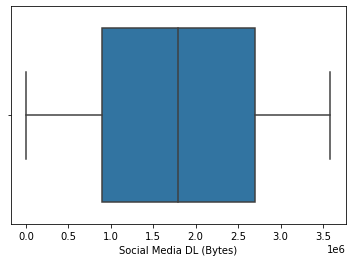

In [188]:
# Box Plot
import seaborn as sns
sns.boxplot(data1['Social Media DL (Bytes)'])


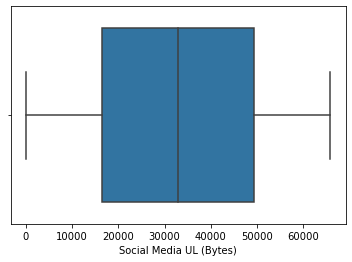

In [189]:
sns.boxplot(data1['Social Media UL (Bytes)'])

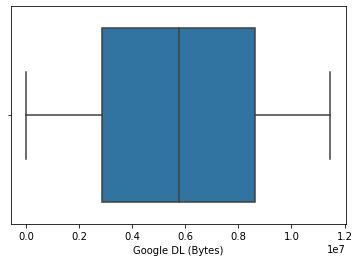

In [190]:
sns.boxplot(data1['Google DL (Bytes)'])

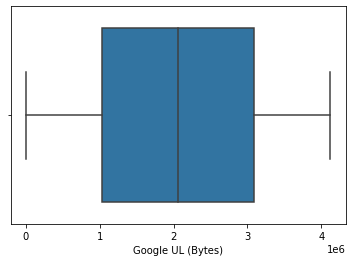

In [191]:
sns.boxplot(data1['Google UL (Bytes)'])

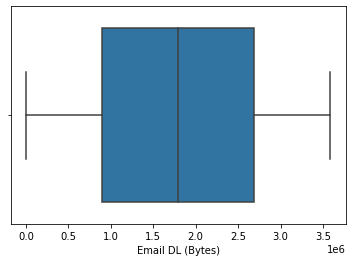

In [192]:
sns.boxplot(data1['Email DL (Bytes)'])

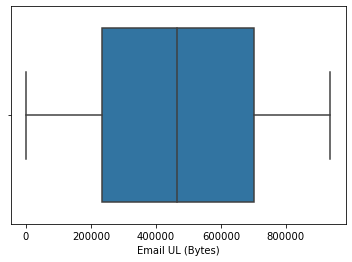

In [194]:
sns.boxplot(data1['Email UL (Bytes)'])

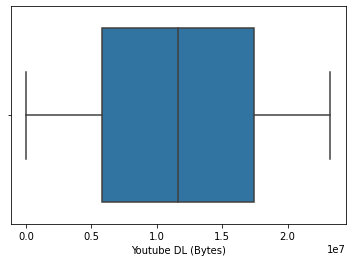

In [195]:
sns.boxplot(data1['Youtube DL (Bytes)'])

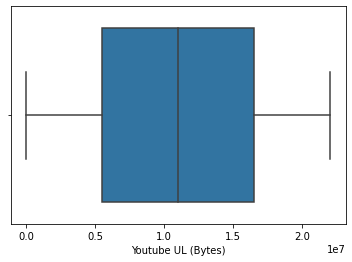

In [196]:
sns.boxplot(data1['Youtube UL (Bytes)'])

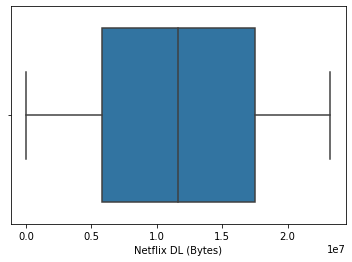

In [197]:
sns.boxplot(data1['Netflix DL (Bytes)'])

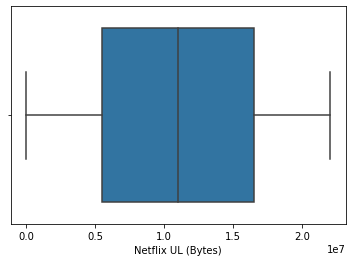

In [198]:
sns.boxplot(data1['Netflix UL (Bytes)'])

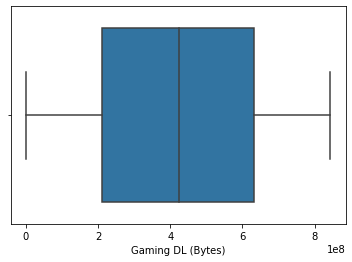

In [199]:
sns.boxplot(data1['Gaming DL (Bytes)'])

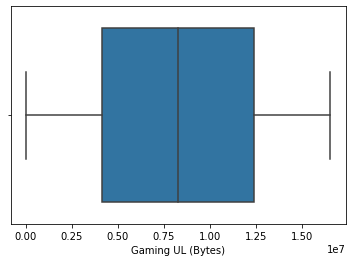

In [200]:
sns.boxplot(data1['Gaming UL (Bytes)'])

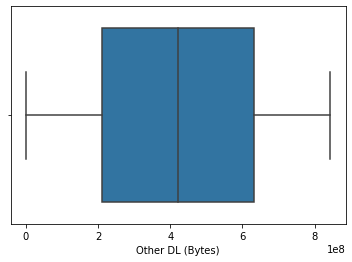

In [201]:
sns.boxplot(data1['Other DL (Bytes)'])

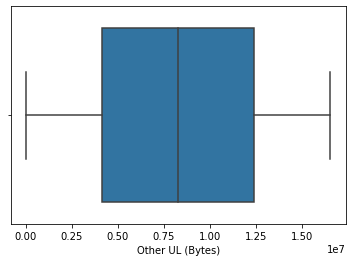

In [202]:
sns.boxplot(data1['Other UL (Bytes)'])

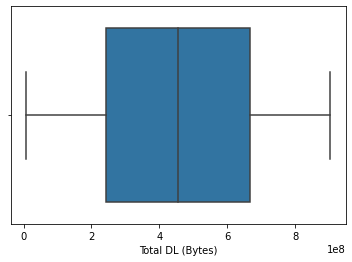

In [203]:
sns.boxplot(data1['Total DL (Bytes)'])

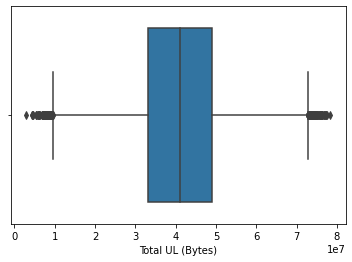

In [204]:
sns.boxplot(data1['Total UL (Bytes)'])

In [219]:
#bivariate analysis
sns.countplot(dataf, 'Social Media DL (Bytes)')

#sns.boxplot(data1, ["Social Media DL (Bytes)", "Total DL Bytes"], 
           # title="Social media vs Total Download")

TypeError: Cannot pass values for both `x` and `y`

In [212]:
#task 1.1 'Total DL','Social Media DL (Bytes)','Google DL (Bytes)', 'Email DL (Bytes)','Youtube DL (Bytes)','Netflix DL (Bytes)','Gaming DL (Bytes)','Other DL (Bytes) '
#aggregate using the MSSID ,'Total UL',Dur. (ms)
pd.pivot_table(data1, values = ['Bearer Id','Total UL (Bytes)','Total DL (Bytes)','Social Media DL (Bytes)','Google DL (Bytes)', 'Email DL (Bytes)','Youtube DL (Bytes)',
                                    'Netflix DL (Bytes)','Gaming DL (Bytes)','Other DL (Bytes)'], index = 'MSISDN/Number')


,Bearer Id,Email DL (Bytes),Gaming DL (Bytes),Google DL (Bytes),Netflix DL (Bytes),Other DL (Bytes),Social Media DL (Bytes),Total DL (Bytes),Total UL (Bytes),Youtube DL (Bytes)
MSISDN/Number,,,,,,,,,,
3.360100e+10,1.311448e+19,837400.0,811091133.0,3337123.0,10265105.0,377096990.0,2206504.0,842637466.0,36053108.0,14900201.0
3.360100e+10,7.349883e+18,2828821.0,105035298.0,4197697.0,770569.0,279557701.0,2598548.0,120755184.0,36104459.0,5324251.0
3.360100e+10,7.349883e+18,2436500.0,529068485.0,3343483.0,16525919.0,495086501.0,3148004.0,556659663.0,39306820.0,2137272.0
3.360101e+10,1.304243e+19,2178618.0,388074835.0,5937765.0,1157362.0,25248001.0,251469.0,401993172.0,20327526.0,4393123.0
3.360101e+10,7.313854e+18,1123904.0,654490546.5,6864334.0,12485823.5,388821856.5,1430615.0,681565208.5,47140263.5,5169985.5
...,...,...,...,...,...,...,...,...,...,...
3.378997e+10,1.311448e+19,3301996.0,122531702.0,7178720.0,19911928.0,408099702.0,1390786.0,174056356.0,34066711.0,19741224.0
3.378998e+10,1.307845e+19,2375275.0,479346580.0,2517865.0,15414306.0,531283626.0,2100448.0,511930983.0,35415710.0,10176509.0
3.379000e+10,1.304243e+19,480946.0,657326717.0,6834178.0,14754741.0,291391283.0,234320.0,687925212.0,26716429.0,8294310.0


In [41]:
pd.pivot_table(dataFrame, values = ['Dur. (ms)','Total UL (Bytes)','Total DL (Bytes)','Social Media DL (Bytes)','Google DL (Bytes)', 'Email DL (Bytes)','Youtube DL (Bytes)',
                                    'Netflix DL (Bytes)','Gaming DL (Bytes)','Other DL (Bytes)'], index = 'Bearer Id', aggfunc=['sum', 'count'])


sum                                                       \
             Dur. (ms) Email DL (Bytes) Gaming DL (Bytes) Google DL (Bytes)   
Bearer Id                                                                     
6.917538e+18   24534.0         782388.0       466109357.0         5791591.0   
6.917538e+18   21489.0         446376.0       673282567.0         3605446.0   
6.917538e+18   27786.0         128003.0       821879090.0        10373157.0   
6.917538e+18   15635.0        3191192.0       805301713.0          269988.0   
6.917538e+18   24264.0         740633.0       583864716.0         1689296.0   
...                ...              ...               ...               ...   
1.318654e+19   80024.0        2410615.0       114093049.0         2036152.0   
1.318654e+19  145291.0        2192057.0       328766801.0         9363661.0   
1.318654e+19   86399.0        2315638.0       833634251.0         1541915.0   
1.318654e+19   86399.0        2612190.0       338246033.0        11318188.0   
1.318654e+19  103113.0        3317462.0       293519955.0         6969652.0   

                                                                          \
             Netflix DL (Bytes) Other DL (Bytes) Social Media DL (Bytes)   
Bearer Id                                                                  
6.917538e+18         19494278.0      670751043.0               2404741.0   
6.917538e+18         19455048.0      501608458.0               2478607.0   
6.917538e+18         15755839.0      472846860.0                944612.0   
6.917538e+18          2859358.0       24303797.0               1817239.0   
6.917538e+18         21563985.0      685122214.0               1867318.0   
...                         ...              ...                     ...   
1.318654e+19         11108134.0      695881178.0               3240226.0   
1.318654e+19         21468525.0      371261255.0               3062671.0   
1.318654e+19         22596930.0      697260277.0                720996.0   
1.318654e+19          9522397.0       17385489.0               2492460.0   
1.318654e+19          9992219.0      440290470.0               1314234.0   

                                                                      count  \
             Total DL (Bytes) Total UL (Bytes) Youtube DL (Bytes) Dur. (ms)   
Bearer Id                                                                     
6.917538e+18      500721999.0       41704610.0          6139644.0         1   
6.917538e+18      709549265.0       38693596.0         10281221.0         1   
6.917538e+18      854465860.0       15548926.0          5385159.0         1   
6.917538e+18      825786510.0       49605688.0         12347020.0         1   
6.917538e+18      624957763.0       21983463.0         15231815.0         1   
...                       ...              ...                ...       ...   
1.318654e+19      145293140.0       35412664.0         12404964.0         1   
1.318654e+19      387001634.0       36189587.0         22147919.0         1   
1.318654e+19      872688792.0       35919460.0         11879062.0         1   
1.318654e+19      386355068.0       40877676.0         22163800.0         1   
1.318654e+19      327212841.0       46147558.0         12099319.0         1   

                                                                   \
             Email DL (Bytes) Gaming DL (Bytes) Google DL (Bytes)   
Bearer Id                                                           
6.917538e+18                1                 1                 1   
6.917538e+18                1                 1                 1   
6.917538e+18                1                 1                 1   
6.917538e+18                1                 1                 1   
6.917538e+18                1                 1                 1   
...                       ...               ...               ...   
1.318654e+19                1                 1                 1   
1.318654e+19                1                 1   

In [13]:
#rows containing duplicate data
duplicate_rows_data=data[data.duplicated()]
print('Number of duplicate rows', duplicate_rows_data.shape)

Number of duplicate rows (0, 55)


In [16]:
#drop duplicate rows
data=data.drop_duplicates()
data.shape

(150001, 55)